In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Movie data files
imdb_metadata_path = "IMDb movies.csv"

# Read the movie data 
imdb_metadata = pd.read_csv(imdb_metadata_path, low_memory=False)

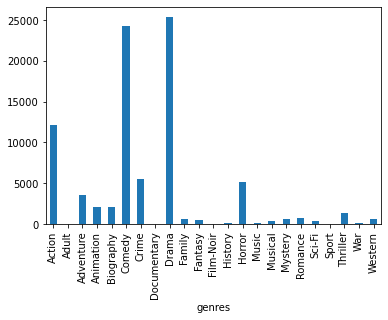

In [43]:
split_cols = imdb_metadata['genre'].str.split(',',expand=True)
split_cols_df = imdb_metadata.join(split_cols)
split_cols_df = split_cols_df.rename(columns ={0:"genres"})
split_cols_df = split_cols_df.drop(["genre", 1,2], axis = 1)
split_cols_df_bar = split_cols_df.groupby('genres')['genres'].count().plot(kind='bar')
plt.show()
